In [1]:
import seaborn as sns
import numpy as np
import pandas as pd 
import ctgan
from scipy.stats import normaltest
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import pickle
from scipy.stats import shapiro
from sdv.tabular import CTGAN
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


## Veri Okuma ##

In [2]:
churn_data = df = pd.read_excel("churn_data.xlsx")

In [3]:
churn_data.head(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data = df = pd.read_excel("customer_data.xlsx")

In [416]:
customer_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data = df = pd.read_excel("internet_data.xlsx")

In [417]:
internet_data.head(5)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


## Veri Birleştirme ##

In [27]:
churn_data.shape

(7042, 9)

In [35]:
churn_data.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
customer_data.shape

(7042, 5)

In [36]:
customer_data.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [34]:
internet_data.shape

(7042, 9)

In [37]:
internet_data.isna().sum()

customerID          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [ ]:
# VERİLERİMİZDE KAYIP DEĞER BULUNMAMAKTADIR. VERİLERİ BİRLEŞTİREBİLİRİZ.

In [6]:
df= pd.merge(churn_data, customer_data, how='inner',on='customerID')


In [7]:
telecom = pd.merge(df,internet_data,how='inner',on='customerID')


## Veri Önİşleme

In [40]:
telecom

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,Female,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No


In [58]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   float64
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["category","object","bool"]]
    num_cat_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["int64","int32","float64","float32"]
                    and dataframe[col].nunique() < cat_th]
    cat_cols += num_cat_cols

    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtype in ["category","object"]
                   and dataframe[col].nunique() > car_th]

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype in ["int64","float64"]
                and dataframe[col].nunique() > cat_th]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_cat_cols: {len(num_cat_cols)}")

    return cat_cols,num_cols,cat_but_car


cat_cols,num_cols,cat_but_car = grab_col_names(telecom)

Observations: 7042
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_cat_cols: 1


In [9]:
# Nümerik değişkenleri num_deg adı altında topladım.
num_deg = df.select_dtypes(include=['float64', 'int64']).copy()

In [10]:
#Nümerik değişkenlerin özet istatistikleri
num_deg.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7042.00,7042.00,7042.00,7042.00
mean,32.37,64.76,2282.52,0.16
std,24.56,30.09,2264.51,0.37
min,0.00,18.25,18.80,0.00
25%,9.00,35.50,402.09,0.00
50%,29.00,70.35,1400.42,0.00
75%,55.00,89.85,3783.60,0.00
max,72.00,118.75,8684.80,1.00


<AxesSubplot:>

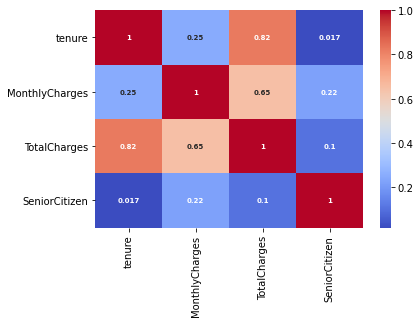

In [333]:
# Nümerik Değişkenler arası ilişkiyi inceler
corr_matrix = telecom.corr()
sns.heatmap(telecom.corr(), annot=True, cmap='coolwarm', annot_kws={"fontsize":7, "fontweight":"bold"})

## Kİ-KARE TESTİ

In [340]:
# Kategorik değişkenler
pd.DataFrame(cat_cols)

In [342]:
# Ki-kare testi
result = {}
for column in telecom.columns:
    if column != 'Churn':
        contingency_table = pd.crosstab(telecom[column], telecom['Churn'])
        _, p_value, _, _ = chi2_contingency(contingency_table)
        result[column] = p_value

In [349]:
# Sonuçları yazdırma
for column, p_value in result.items():
 print(f'{column} - p-value: {p_value}')
   

customerID - p-value: 0.49439727682293294
tenure - p-value: 1.5063350129206513e-176
PhoneService - p-value: 0.3376178354605148
Contract - p-value: 7.396089591459741e-258
PaperlessBilling - p-value: 3.69745175840287e-58
PaymentMethod - p-value: 4.227881844739379e-140
MonthlyCharges - p-value: 1.5034421184584665e-18
TotalCharges - p-value: 0.5530839959278123
gender - p-value: 0.4910230550124751
SeniorCitizen - p-value: 1.57972151437359e-36
Partner - p-value: 1.9534760854584407e-36
Dependents - p-value: 4.62921363980148e-43
MultipleLines - p-value: 0.003535210440074958
InternetService - p-value: 7.556647991204088e-160
OnlineSecurity - p-value: 3.136632729570642e-185
OnlineBackup - p-value: 1.700916002042848e-131
DeviceProtection - p-value: 5.940156053688936e-122
TechSupport - p-value: 1.6920559405943222e-180
StreamingTV - p-value: 5.342120862046149e-82
StreamingMovies - p-value: 2.5828769530011345e-82


# NORMALLİK TESİ

In [352]:
from scipy.stats import shapiro

# Çoklu normallik testi
for column in num_cols:
    if column != 'Sex':
        statistic, p_value = shapiro(df[column])
        print(f'{column}:')
        print(f'Statistic: {statistic:.4f}')
        print(f'p-value: {p_value:.4f}')
        if p_value > 0.05:
            print('Dağılım normaldir.')
        else:
            print('Dağılım normal değildir.')
        print('-------------------------')

tenure:
Statistic: 0.9037
p-value: 0.0000
Dağılım normal değildir.
-------------------------
MonthlyCharges:
Statistic: 0.9209
p-value: 0.0000
Dağılım normal değildir.
-------------------------
TotalCharges:
Statistic: 0.8607
p-value: 0.0000
Dağılım normal değildir.
-------------------------


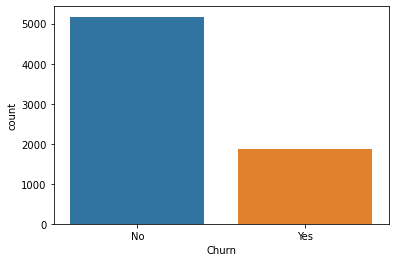

In [66]:
churn_plot = sns.countplot(telecom['Churn'])

In [63]:
telecom.groupby('Churn').mean()


,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
Churn,,,,
No,37.56,61.26,2553.76,0.13
Yes,17.98,74.44,1531.80,0.25


In [11]:
telecom = telecom.drop(columns='customerID')

In [12]:
telecom.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [13]:
# Yes-No cevapları 0-1 dönüşümü

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

telecom[varlist] = telecom[varlist].apply(binary_map)

In [14]:

# 'MultipleLines' dummy yapımı
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# MultipleLines_No çıkarıyoruz.
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
# 2 veriyi birleştiriyoruz
telecom = pd.concat([telecom,ml1], axis=1)

In [15]:
iss = pd.get_dummies(telecom.InternetService)
iss = iss.drop(['No'], axis=1)
telecom = pd.concat([telecom, iss], axis=1)

In [16]:
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)

telecom = pd.concat([telecom,os1], axis=1)

In [17]:
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
telecom= pd.concat([telecom,dp1], axis=1)

In [18]:
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
telecom= pd.concat([telecom,ts1], axis=1)

In [19]:
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
telecom = pd.concat([telecom,st1], axis=1)


In [20]:
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
telecom = pd.concat([telecom,sm1], axis=1)

In [21]:
# Cinsiyet dönüşümü
def gender_map(x):
    return x.map({'Female': 1, "Male": 0})

# Applying the function to the housing list
telecom['gender'] = telecom[['gender']].apply(gender_map)

In [22]:
cc = pd.get_dummies(telecom.Contract)
telecom = pd.concat([telecom,cc], axis=1)

In [23]:
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
telecom = pd.concat([telecom,ob1], axis=1)

In [24]:
pm = pd.get_dummies(telecom.PaymentMethod)
telecom = pd.concat([telecom,pm], axis=1)

In [25]:
telecom.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,...,StreamingMovies_Yes,Month-to-month,One year,Two year,OnlineBackup_No,OnlineBackup_Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,34,1,One year,0,Mailed check,56.95,1889.50,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,...,0,1,0,0,1,0,0,0,1,0


In [26]:
telecom.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines_No',
       'MultipleLines_Yes', 'DSL', 'Fiber optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Month-to-month', 'One year', 'Two year', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check'],
      dtype='object')

In [27]:
telecom = telecom.drop(['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 
                              'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'], axis=1)

In [28]:
telecom= telecom.drop(['PaymentMethod', 'Contract',], axis=1)

In [29]:
telecom.shape

(7042, 33)

In [30]:
telecom.head(5)

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,StreamingMovies_Yes,Month-to-month,One year,Two year,OnlineBackup_No,OnlineBackup_Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,1,0,1,29.85,29.85,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,2,1,1,53.85,108.15,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,45,0,0,42.30,1840.75,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,2,1,1,70.70,151.65,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


# MODEL EĞİTİMİ 

In [43]:
X = telecom.drop(['Churn'], axis=1)
Y = telecom['Churn']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state = 100)


In [45]:
import statsmodels.api as sm


In [46]:
def get_lrm(y_train, x_train):
    lrm = sm.GLM(y_train, (sm.add_constant(x_train)), family = sm.families.Binomial())
    lrm = lrm.fit()
    print(lrm.summary())
    return lrm

In [47]:
lrm_1 =get_lrm(y_train, X_train)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 5633
Model:                            GLM   Df Residuals:                     5609
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2322.7
Date:                Thu, 01 Jun 2023   Deviance:                       4645.4
Time:                        08:41:39   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2811
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [39]:
from sklearn.linear_model import LogisticRegression
loj_reg = LogisticRegression()

In [298]:
loj_reg.fit(X_train, y_train) 


LogisticRegression()

In [299]:
loj_reg.score(X_train, y_train) 

0.808450204154092

In [300]:
y_pred_loj = loj_reg.predict(X_test)

In [301]:
def compute(ytest, ypred): 

    cm = confusion_matrix(ytest, ypred)
    class_label = ["true", "false"]
    class_label_2 = ["positive", "negetive"]
    df_cm = pd.DataFrame(cm, index=class_label, columns=class_label_2)
    sns.heatmap(df_cm, annot=True, cmap='coolwarm', linewidths=2, fmt='d')
    plt.title("Confusion Matrix", fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

   
    acc = accuracy_score(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    precision, recall, fscore, train_support = score(ytest, ypred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore, 3), round((acc * 100), 3), round((mse), 3)))

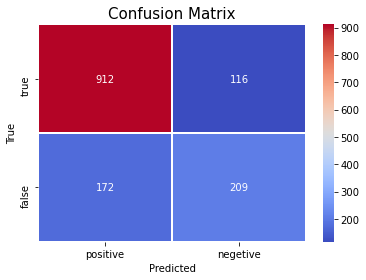

Precision: 0.643 
Recall: 0.549 
F1-Score: 0.592 
Accuracy: 79.56 %
Mean Square Error: 0.204
None


In [302]:
#LOJİSTİK REGRESYON BAŞARI METRİĞİ
classify_eval = compute(y_test, loj_reg.predict(X_test))
print(classify_eval)

In [303]:
# Farklı bir değerlendirme metriği olan ROC eğrisini çizdiriyorum.
log_reg_optim_2 = LogisticRegression(random_state=1337, max_iter=500).fit(X_train, y_train)
y_pred_proba = log_reg_optim_2.predict_proba(X_test)[:, 1] 

roc_auc_log = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc_log)

ROC-AUC Score: 0.8378741689389995


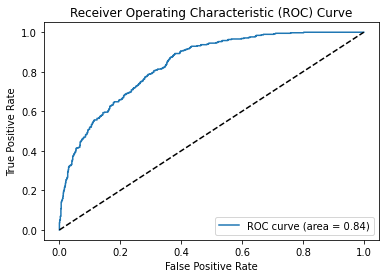

In [304]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = log_reg_optim_2.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [357]:
# Kesim noktasını belirlendi
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Kesim Noktası (Eşik Değeri):", optimal_threshold)

Kesim Noktası (Eşik Değeri): 0.18995725061583987


In [412]:
# deney birimi için tahmin edilen olasılıklar
predicted_prob = loj_reg.predict_proba(X_test)[:, 1]
print("Tahmin Edilen Olasılık:", predicted_prob)

Tahmin Edilen Olasılık: [0.00811258 0.00308022 0.00910018 ... 0.70776125 0.20692062 0.03097091]


# ODDS HESAPLAMA

In [355]:
# Katsayıları ve oranlar
katsayilar = model.coef_[0]
odds = np.exp(coefficients)



In [356]:
for i, katsayilar in enumerate(katsayilar):
    print("Öznitelik {}: Katsayı = {:.4f}, Odds_Ratio = {:.4f}".format(i+1, katsayilar, odds[i]))

Öznitelik 1: Katsayı = -0.0674, Odds_Ratio = 0.9348
Öznitelik 2: Katsayı = -0.5063, Odds_Ratio = 0.6027
Öznitelik 3: Katsayı = 0.3690, Odds_Ratio = 1.4463
Öznitelik 4: Katsayı = 0.0031, Odds_Ratio = 1.0031
Öznitelik 5: Katsayı = 0.0004, Odds_Ratio = 1.0004
Öznitelik 6: Katsayı = 0.0115, Odds_Ratio = 1.0116
Öznitelik 7: Katsayı = 0.2532, Odds_Ratio = 1.2881
Öznitelik 8: Katsayı = -0.0092, Odds_Ratio = 0.9909
Öznitelik 9: Katsayı = -0.2290, Odds_Ratio = 0.7953
Öznitelik 10: Katsayı = -0.3235, Odds_Ratio = 0.7236
Öznitelik 11: Katsayı = -0.1828, Odds_Ratio = 0.8330
Öznitelik 12: Katsayı = -0.2697, Odds_Ratio = 0.7636
Öznitelik 13: Katsayı = 0.3579, Odds_Ratio = 1.4303
Öznitelik 14: Katsayı = 0.3072, Odds_Ratio = 1.3595
Öznitelik 15: Katsayı = -0.2190, Odds_Ratio = 0.8033
Öznitelik 16: Katsayı = 0.0790, Odds_Ratio = 1.0822
Öznitelik 17: Katsayı = 0.0091, Odds_Ratio = 1.0091
Öznitelik 18: Katsayı = 0.2986, Odds_Ratio = 1.3479
Öznitelik 19: Katsayı = -0.2105, Odds_Ratio = 0.8102
Öznitelik 20

# VARYANS-COV MATRİSİ

In [310]:
# Varyans-kovaryans matrisini hesaplama
cov_matrix = np.cov(katsayilar.T)

In [311]:
cov_matrix

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

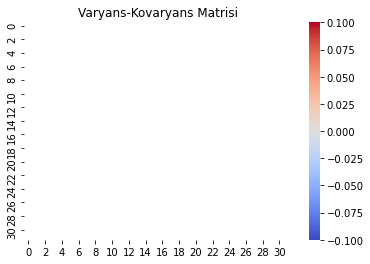

In [312]:
# Varyans-kovaryans matrisini görselleştirme
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title('Varyans-Kovaryans Matrisi')
plt.show()

# AYKIRI DEĞERLER ÇIKARILARAK YENİ MODEL

In [31]:
telecom_copy = telecom.copy()


In [32]:
Q1 = telecom_copy['TotalCharges'].quantile(0.25)
Q3 = telecom_copy['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
telecom_copy = telecom_copy[(telecom_copy['TotalCharges'] >= lower_bound) & (telecom_copy['TotalCharges'] <= upper_bound)]

In [33]:
Q1 = telecom_copy["MonthlyCharges"].quantile(0.25)
Q3 = telecom_copy["MonthlyCharges"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
telecom_copy = telecom_copy[(telecom_copy["MonthlyCharges"] >= lower_bound) & (telecom_copy["MonthlyCharges"] <= upper_bound)]

In [34]:
Q1 = telecom_copy["tenure"].quantile(0.25)
Q3 = telecom_copy["tenure"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
telecom_copy = telecom_copy[(telecom_copy["tenure"] >= lower_bound) & (telecom_copy["tenure"] <= upper_bound)]

In [35]:
X_yeni = telecom_copy.drop(['Churn'], axis=1)
y_yeni = telecom_copy['Churn']

In [36]:
X_train_yeni, X_test_yeni, y_train_yeni, y_test_yeni = train_test_split(X_yeni, y_yeni, train_size=0.8, test_size=0.2, random_state = 100)

In [40]:
# Lojistik regresyon modelini kurma
new_model = LogisticRegression()


In [41]:
new_model.fit(X_yeni, y_yeni)

LogisticRegression()

In [48]:
new_model.score(X_train_yeni, y_train_yeni) 

0.807030001775253

In [50]:
y_pred_loj_new = new_model.predict(X_test_yeni)

In [52]:
y_pred_loj_new

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# ROC EĞRİSİ

In [407]:
y_pred_loj_new = log_reg_optim_2.predict_proba(X_test_yeni)[:, 1]  

roc_auc_log = roc_auc_score(y_test_yeni, y_pred_loj_new)
print("ROC-AUC Score:", roc_auc_log)

ROC-AUC Score: 0.8378741689389995


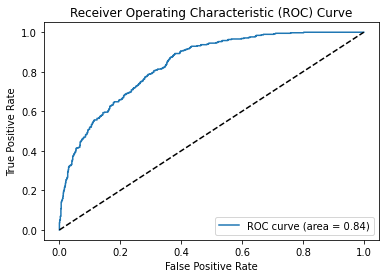

In [408]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_yeni, y_pred_loj_new)

roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [409]:
# Kesim noktasını belirlendi
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Kesim Noktası (Eşik Değeri):", optimal_threshold)

Kesim Noktası (Eşik Değeri): 0.18995725061583987


In [411]:
# deney birimi için tahmin edilen olasılıklar
predicted_prob = new_model.predict_proba(X_test_yeni)[:, 1]
print("Tahmin Edilen Olasılık:", predicted_prob)

Tahmin Edilen Olasılık: [0.0071643  0.00232004 0.00822161 ... 0.71440693 0.21048378 0.03517014]


# OR HESAPLAMA

In [413]:
# Katsayıları ve oranlar
katsayilar = new_model.coef_[0]
odds = np.exp(coefficients)


In [414]:
for i, katsayilar in enumerate(katsayilar):
    print("Öznitelik {}: Katsayı = {:.4f}, Odds_Ratio = {:.4f}".format(i+1, katsayilar, odds[i]))

Öznitelik 1: Katsayı = -0.0674, Odds_Ratio = 0.9348
Öznitelik 2: Katsayı = -0.5063, Odds_Ratio = 0.6027
Öznitelik 3: Katsayı = 0.3690, Odds_Ratio = 1.4463
Öznitelik 4: Katsayı = 0.0031, Odds_Ratio = 1.0031
Öznitelik 5: Katsayı = 0.0004, Odds_Ratio = 1.0004
Öznitelik 6: Katsayı = 0.0115, Odds_Ratio = 1.0116
Öznitelik 7: Katsayı = 0.2532, Odds_Ratio = 1.2881
Öznitelik 8: Katsayı = -0.0092, Odds_Ratio = 0.9909
Öznitelik 9: Katsayı = -0.2290, Odds_Ratio = 0.7953
Öznitelik 10: Katsayı = -0.3235, Odds_Ratio = 0.7236
Öznitelik 11: Katsayı = -0.1828, Odds_Ratio = 0.8330
Öznitelik 12: Katsayı = -0.2697, Odds_Ratio = 0.7636
Öznitelik 13: Katsayı = 0.3579, Odds_Ratio = 1.4303
Öznitelik 14: Katsayı = 0.3072, Odds_Ratio = 1.3595
Öznitelik 15: Katsayı = -0.2190, Odds_Ratio = 0.8033
Öznitelik 16: Katsayı = 0.0790, Odds_Ratio = 1.0822
Öznitelik 17: Katsayı = 0.0091, Odds_Ratio = 1.0091
Öznitelik 18: Katsayı = 0.2986, Odds_Ratio = 1.3479
Öznitelik 19: Katsayı = -0.2105, Odds_Ratio = 0.8102
Öznitelik 20